# Plot 2D Plot of sharing long vrs short ROH blocks

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
from scipy.stats import binned_statistic  # For Binning

import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

import socket
import os as os
import sys as sys
import multiprocessing as mp

### Do the Arial 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the default
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

### Additional Imports
sys.path.append("./PackagesSupport/")
from sqrt_scale import SquareRootScale # Import Matplotlib sqrt scale

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Do the 2D Plot

In [64]:
def plot_scatter_by_color(ax, x, y, colors, labels, s):
    """Split up df per color, used to create legend
    (based on "clst" column)"""
    
    for c in pd.unique(colors):
        idx = (colors == c)
        ax.scatter(x[idx], y[idx], c=c, ec="k", s=s, 
                    label=labels[idx][0], zorder=1)

def plot_long_short_roh(df, fs=14, cm1=4, cm2=12, figsize=(8,8), s=50,
                       scale="linear", title="", plot_iids=True):
    """Pot Long and Short ROH in 2D plot"""
    long_roh = df[f"sum_roh>{cm2}"]
    short_roh = df[f"sum_roh>{cm1}"] - df[f"sum_roh>{cm2}"]
    colors, labels = df["color"].values, df["clst"].values
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    #ax.scatter(short_roh, long_roh, ec="k", s=s)
    
    plot_scatter_by_color(ax, short_roh, long_roh, colors, labels, s)
    
    if plot_iids:
        for i in range(len(df_t)):
            ax.text(short_roh[i]-12, long_roh[i]+4, df_t["iid"][i])
    ax.set_xlabel(f"Sum ROH {cm1}-{cm2} cM", fontsize=fs)
    ax.set_ylabel(f"Sum ROH>{cm2} cM", fontsize=fs)
    ax.legend(loc="center right")
    
    ax.set_yscale(scale)
    ax.set_xscale(scale)
    
    if len(title)>0:
        ax.set_title(title, fontsize=fs)
    
    plt.show()

def pre_process_roman_df(df, roh_error=0, cm1=4, cm2=12):
    """Preprocess and return roman df and adds colors"""
    color_dict = {"Medieval/EarlyModern":"yellow", "Imperial":"red", "Iron/Republic":"magenta", "LateAntiquity":"orange", 
              "Copper Age":"aquamarine", "Neolithic":"dodgerblue", "Mesolithic":"purple", "(not included in analyses)":"gray"}
    df["color"] = df["clst"].map(color_dict)
    if roh_error>0:
        df[f"sum_roh>{cm1}"]+= np.random.random(len(df))*roh_error - roh_error/2
        df[f"sum_roh>{cm2}"]+= np.random.random(len(df))*roh_error - roh_error/2
    df = df.sort_values(by="age", ascending=False) # Sort by age from old to young
    return df

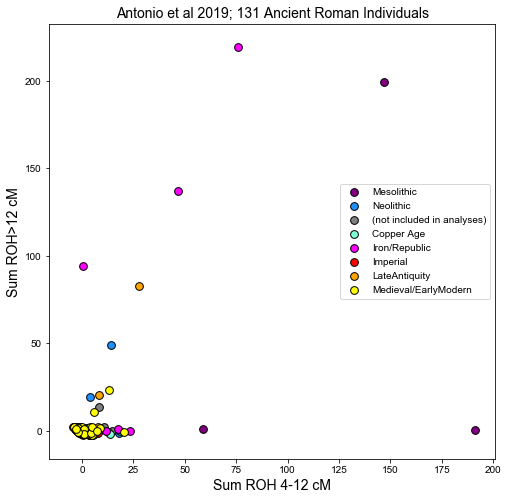

In [73]:
df_t = pd.read_csv("./Empirical/1240k/Antonio/combined_roh05.csv", sep="\t")
df_t = pre_process_roman_df(df_t, roh_error=5)
plot_long_short_roh(df_t, title=f"Antonio et al 2019; {len(df_t)} Ancient Roman Individuals", 
                    s=60, plot_iids=False)

# Area 51